In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv( 'ripple_event_chars.csv')
data

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,hour,condition,rat
0,134.335052,132.916221,298.317234,6.165582,0.073333,501.947144,11420.950369,0.976021,11.0,5.145256,1,HC,1
1,127.037757,124.305592,497.048291,8.996310,0.058333,860.219762,36439.500384,0.994694,8.0,4.768099,1,HC,1
2,134.499346,138.733123,296.428197,8.637603,0.106667,565.767987,11621.768158,0.993651,16.0,5.023939,1,HC,1
3,138.955976,137.832377,225.212268,5.439281,0.065000,378.733588,10464.946537,0.995727,9.0,5.058782,1,HC,1
4,142.703078,135.915989,203.127282,5.917495,0.093333,338.102554,6392.267900,1.109268,14.0,4.985887,1,HC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25690,175.396636,173.234692,213.669689,3.651451,0.061667,403.787040,6504.100242,0.999473,10.0,5.360476,5,RET,4
25691,133.087535,134.434527,222.708906,4.273101,0.066667,398.623953,7654.711799,1.286397,10.0,5.156993,5,RET,4
25692,149.976357,176.870183,727.327213,8.852424,0.085000,1215.197614,33892.587542,1.236085,13.0,5.493668,5,RET,4
25693,152.728029,155.917298,222.783436,12.211191,0.203333,397.673340,6237.343611,0.996896,32.0,5.386663,5,RET,4


In [9]:
post_data = data.copy()
post_data = post_data.loc[post_data.hour>1].reset_index(drop=True)
post_data.head(5)

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,hour,condition,rat
0,146.631405,137.027996,236.434594,9.681138,0.116667,421.413707,9737.337732,0.990558,16.0,4.925690,2,HC,1
1,135.921003,140.991078,299.138547,7.566730,0.095000,536.385752,10697.363856,0.998001,14.0,5.215154,2,HC,1
2,151.302872,148.086602,337.830980,25.835286,0.281667,558.328357,13241.920984,1.092083,44.0,5.181408,2,HC,1
3,34.584912,155.957769,225.809365,7.648450,1.090000,408.791126,697.965668,0.332041,24.0,7.456011,2,HC,1
4,152.099910,147.352061,257.422611,4.468201,0.060000,402.189407,8494.558142,0.979869,9.0,5.502780,2,HC,1


In [10]:
pre_data = data.copy()
pre_data = pre_data.loc[pre_data.hour==1].reset_index(drop=True)
pre_data.head(5)

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,hour,condition,rat
0,134.335052,132.916221,298.317234,6.165582,0.073333,501.947144,11420.950369,0.976021,11.0,5.145256,1,HC,1
1,127.037757,124.305592,497.048291,8.996310,0.058333,860.219762,36439.500384,0.994694,8.0,4.768099,1,HC,1
2,134.499346,138.733123,296.428197,8.637603,0.106667,565.767987,11621.768158,0.993651,16.0,5.023939,1,HC,1
3,138.955976,137.832377,225.212268,5.439281,0.065000,378.733588,10464.946537,0.995727,9.0,5.058782,1,HC,1
4,142.703078,135.915989,203.127282,5.917495,0.093333,338.102554,6392.267900,1.109268,14.0,4.985887,1,HC,1


In [36]:
hc_data = data.loc[data.condition == 'HC'].copy()
enc_data = data.loc[data.condition == 'ENC'].copy()
ret_data = data.loc[data.condition == 'RET'].copy()

### amplitude

In [11]:
## amplitude
# postsleep

Amp_post_data = post_data[['condition', 'hour', 'amplitude']].copy()
#Sort df
sorted_Amp_post_data = Amp_post_data.sort_values(by=['amplitude'], axis=0, ascending=True)
#95th percentile
sorted_Amp_post_data.quantile(q=0.95, axis=0)

hour            5.000000
amplitude    1878.446342
Name: 0.95, dtype: float64

In [12]:
#preslepp
Amp_pre_data = pre_data[['condition', 'hour', 'amplitude']].copy()
#Sort df
sorted_Amp_pre_data = Amp_pre_data.sort_values(by=['amplitude'], axis=0, ascending=True)
#95th percentile
sorted_Amp_pre_data.quantile(q=0.95, axis=0)

hour            1.000000
amplitude    1196.207617
Name: 0.95, dtype: float64

### duration

In [15]:
## duration
# postsleep
Dur_post_data = post_data[['condition', 'hour', 'duration']].copy()
#Sort df
sorted_Dur_post_data = Dur_post_data.sort_values(by=['duration'], axis=0, ascending=True)

#95th percentile
sorted_Dur_post_data.quantile(q=0.95, axis=0)

hour        5.000000
duration    0.263333
Name: 0.95, dtype: float64

In [16]:
#presleep
Dur_pre_data = pre_data[['condition', 'hour', 'duration']].copy()
#Sort df
sorted_Dur_pre_data = Dur_pre_data.sort_values(by=['duration'], axis=0, ascending=True)

#95th percentile
sorted_Dur_pre_data.quantile(q=0.95, axis=0)

hour        1.00
duration    0.21
Name: 0.95, dtype: float64

### average frequency

In [17]:
## average frequency
# postsleep
Fre_post_data = post_data[['condition', 'hour', 'avg_freq']].copy()
#Sort df
sorted_Fre_post_data = Fre_post_data.sort_values(by=['avg_freq'], axis=0, ascending=True)

#95th percentile
print(sorted_Fre_post_data.quantile(q=0.95, axis=0))

#5th percentile
print(sorted_Fre_post_data.quantile(q=0.05, axis=0))

hour          5.000000
avg_freq    172.972207
Name: 0.95, dtype: float64
hour          2.000000
avg_freq    132.862516
Name: 0.05, dtype: float64


In [18]:
# presleep
Fre_pre_data = pre_data[['condition', 'hour', 'avg_freq']].copy()
#Sort df
sorted_Fre_pre_data = Fre_pre_data.sort_values(by=['avg_freq'], axis=0, ascending=True)

#95th percentile
print(sorted_Fre_pre_data.quantile(q=0.95, axis=0))

#5th percentile
print(sorted_Fre_pre_data.quantile(q=0.05, axis=0))

hour          1.000000
avg_freq    178.151293
Name: 0.95, dtype: float64
hour          1.000000
avg_freq    132.851883
Name: 0.05, dtype: float64


## Violin Plots

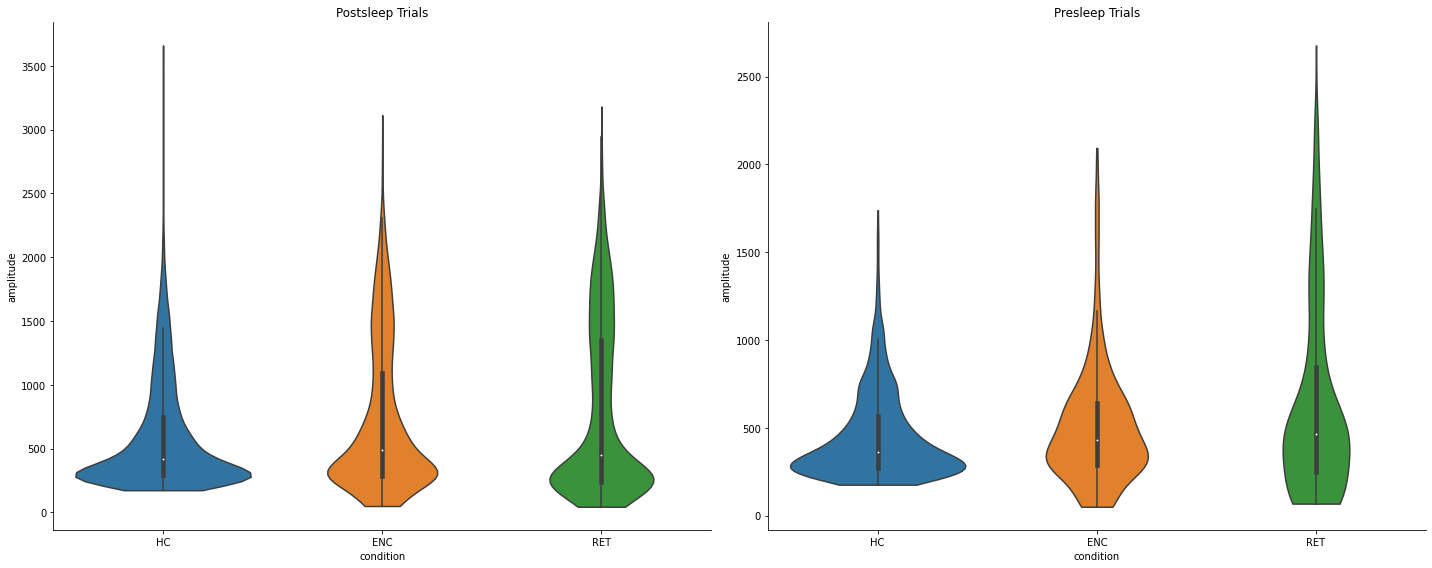

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(x=Amp_post_data['condition'], y=Amp_post_data['amplitude'], data=Amp_post_data, cut=0 ,ax=axes[0]).set(title='Postsleep Trials')
sns.violinplot(x=Amp_pre_data['condition'], y=Amp_pre_data['amplitude'], data=Amp_pre_data, cut=0 , ax = axes[1]).set(title='Presleep Trials')

sns.despine()
fig.tight_layout()


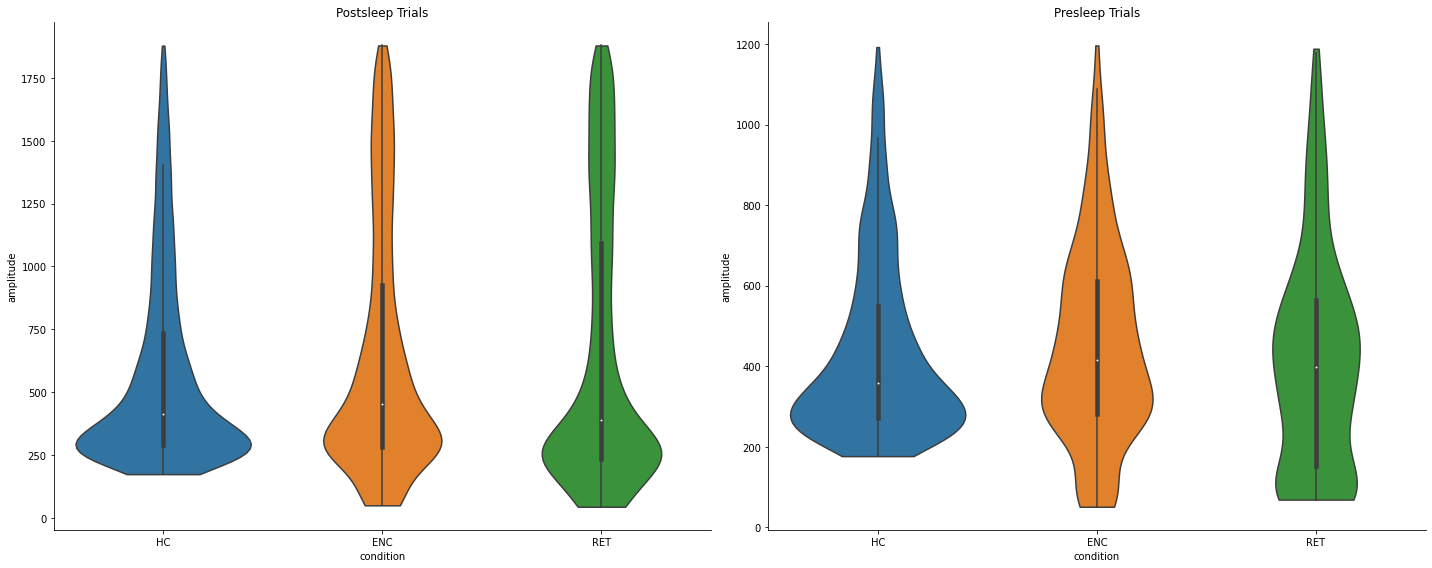

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(x=Amp_post_data[Amp_post_data['amplitude']<1879]['condition'], y=Amp_post_data[Amp_post_data['amplitude']<1879]['amplitude'], data=Amp_post_data, cut=0, ax=axes[0]).set(title='Postsleep Trials')
sns.violinplot(x=Amp_pre_data[Amp_pre_data['amplitude']<1197]['condition'], y=Amp_pre_data[Amp_pre_data['amplitude']<1197]['amplitude'], data=Amp_post_data, cut=0, ax=axes[1]).set(title='Presleep Trials')

sns.despine()
fig.tight_layout()

In [30]:
import plotly.express as px

fig = px.violin(Amp_post_data, x=Amp_post_data[Amp_post_data["amplitude"]<1879]["condition"], y=Amp_post_data[Amp_post_data["amplitude"]<1879]["amplitude"], points="all").update_layout(yaxis_title="Amplitude", xaxis_title="Condition", title="Postsleep Trials")

fig.show()

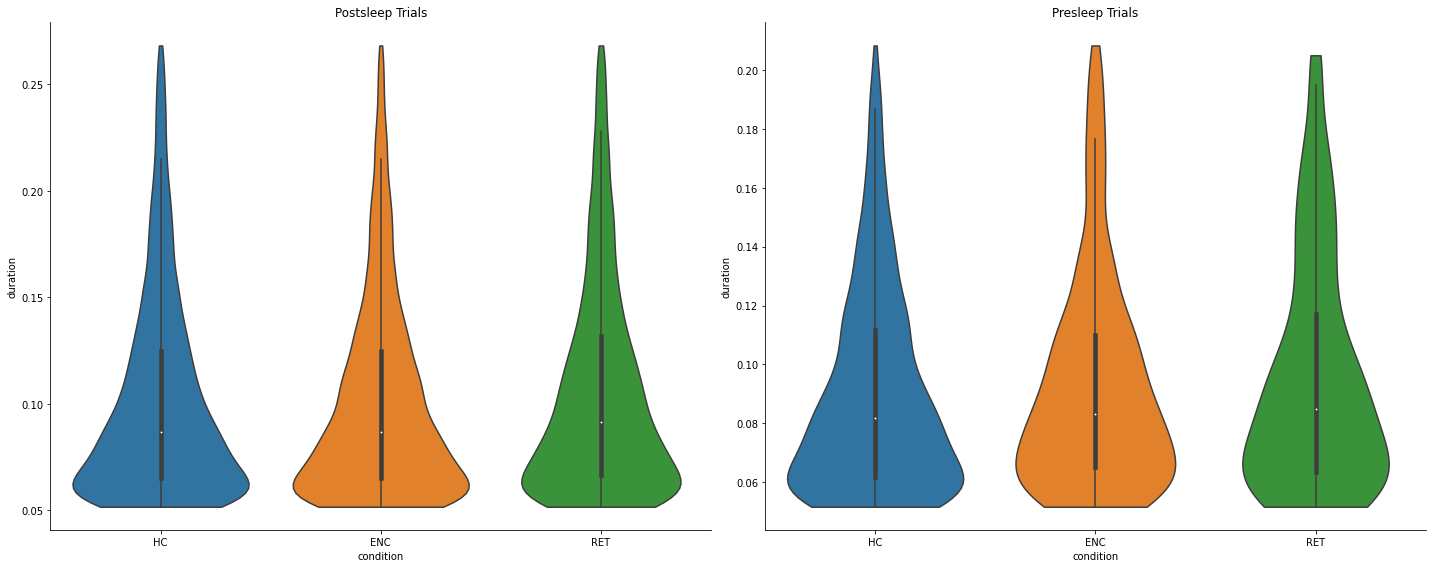

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(x=Dur_post_data[Dur_post_data['duration']<0.27]['condition'], y=Dur_post_data[Dur_post_data['duration']<0.27]['duration'], data=Dur_post_data, cut=0, ax = axes[0]).set(title='Postsleep Trials')
sns.violinplot(x=Dur_pre_data[Dur_pre_data['duration']<0.21]['condition'], y=Dur_pre_data[Dur_pre_data['duration']<0.21]['duration'], data=Dur_pre_data, cut=0 , ax = axes[1]).set(title='Presleep Trials')

sns.despine()
fig.tight_layout()

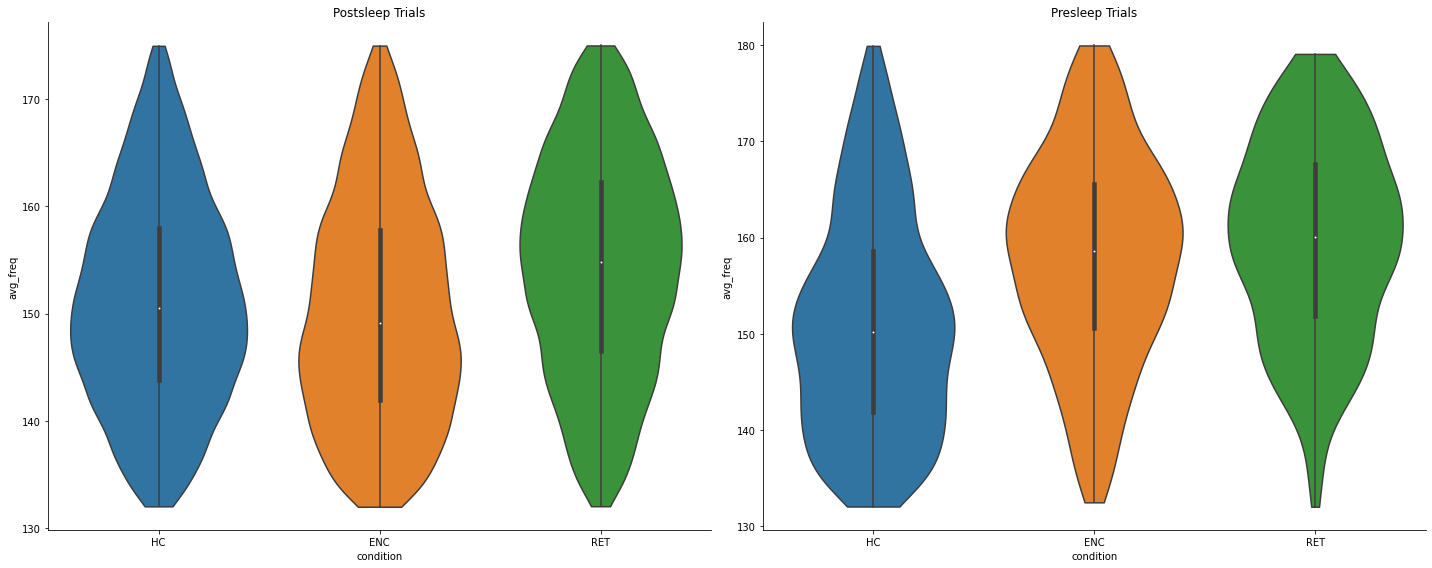

In [34]:
#<175 because 172.972207 is 95th percentile
#>132 because 132.851883 is 5th percentile
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(x=Fre_post_data[(Fre_post_data['avg_freq']<175) & (Fre_post_data['avg_freq']>132)]['condition'], y=Fre_post_data[(Fre_post_data['avg_freq']<175) & (Fre_post_data['avg_freq']>132)]['avg_freq'], data=Fre_post_data, cut=0 , ax = axes[0]).set(title='Postsleep Trials')
sns.violinplot(x=Fre_pre_data[(Fre_pre_data['avg_freq']<180) & (Fre_pre_data['avg_freq']>132)]['condition'], y=Fre_pre_data[(Fre_pre_data['avg_freq']<180) & (Fre_pre_data['avg_freq']>132)]['avg_freq'], data=Fre_pre_data, cut=0 , ax = axes[1]).set(title='Presleep Trials')

sns.despine()
fig.tight_layout()

## Violin plots per hour

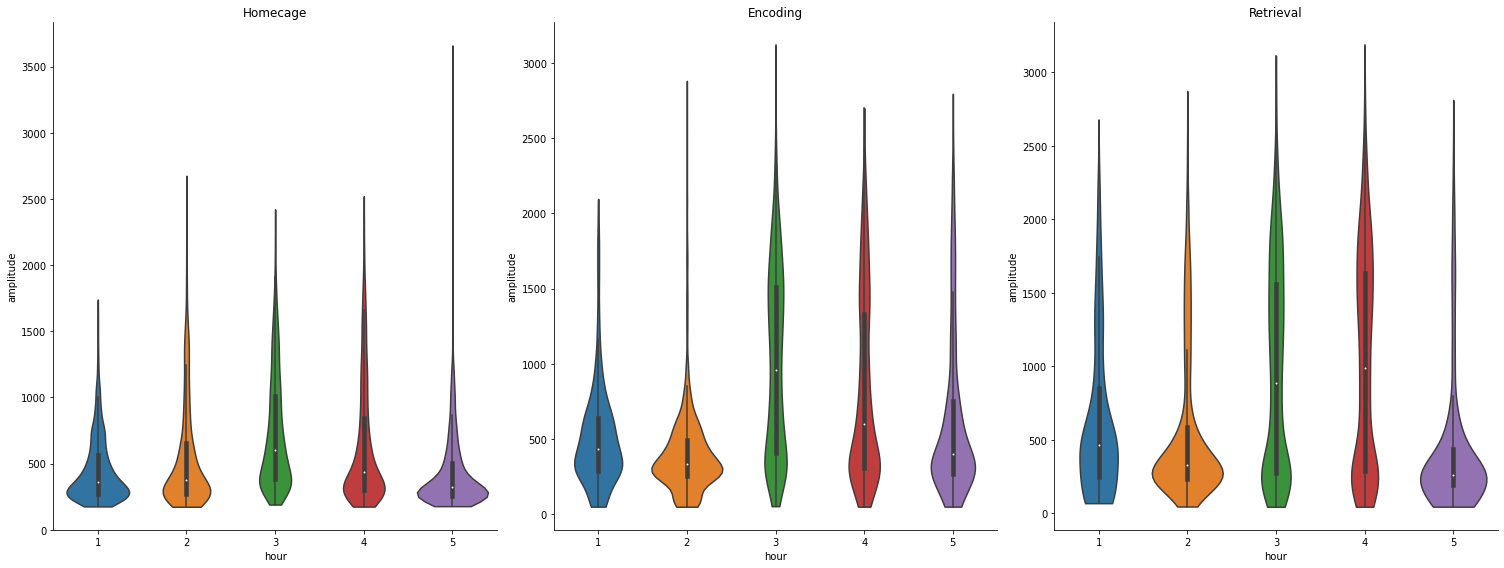

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(21, 8))
sns.violinplot(x=hc_data['hour'], y=hc_data['amplitude'], data=hc_data, cut=0 ,ax=axes[0]).set(title='Homecage')
sns.violinplot(x=enc_data['hour'], y=enc_data['amplitude'], data=enc_data, cut=0 , ax = axes[1]).set(title='Encoding')
sns.violinplot(x=ret_data['hour'], y=ret_data['amplitude'], data=ret_data, cut=0 , ax = axes[2]).set(title='Retrieval')

sns.despine()
fig.tight_layout()

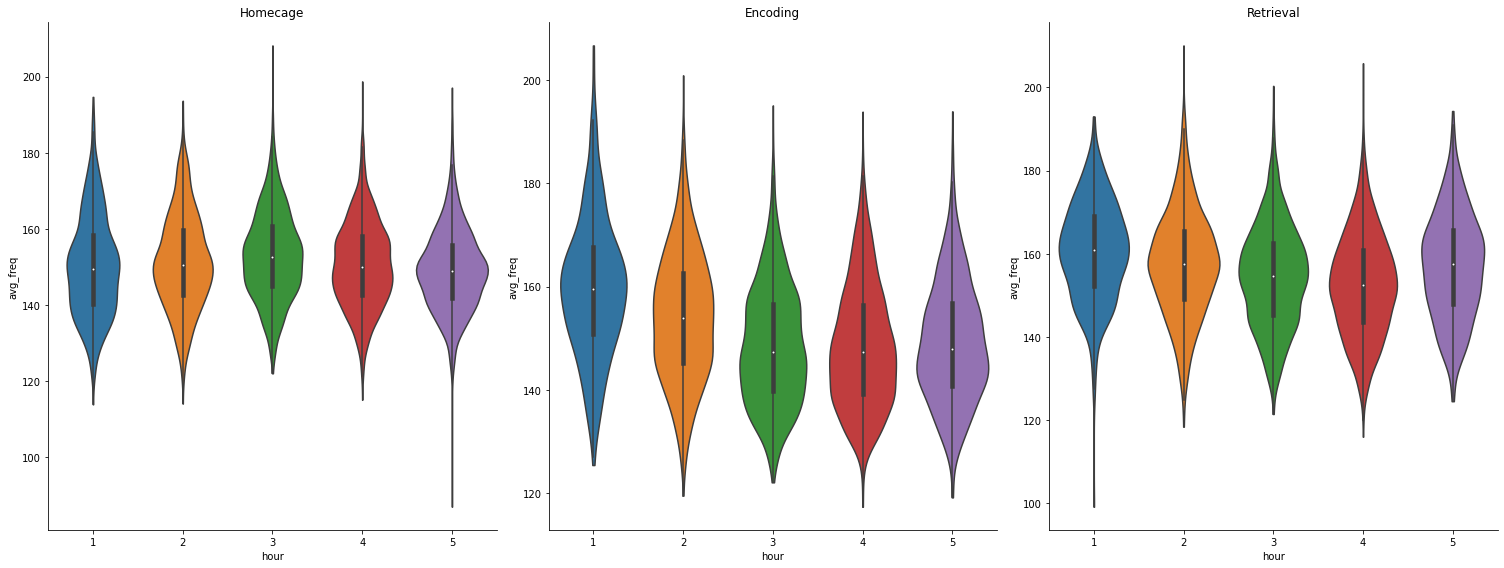

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(21, 8))
sns.violinplot(x=hc_data['hour'], y=hc_data['avg_freq'], data=hc_data, cut=0 ,ax=axes[0]).set(title='Homecage')
sns.violinplot(x=enc_data['hour'], y=enc_data['avg_freq'], data=enc_data, cut=0 , ax = axes[1]).set(title='Encoding')
sns.violinplot(x=ret_data['hour'], y=ret_data['avg_freq'], data=ret_data, cut=0 , ax = axes[2]).set(title='Retrieval')

sns.despine()
fig.tight_layout()

## analysis for short ripples (duration < 100ms) in the first hour

In [50]:
short_ripple_h1 = data.loc[data.duration < 0.1].copy()
short_ripple_h1 = short_ripple_h1.loc[data.hour==2]
short_ripple_h1

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,hour,condition,rat
623,135.921003,140.991078,299.138547,7.566730,0.095000,536.385752,10697.363856,0.998001,14.0,5.215154,2,HC,1
626,152.099910,147.352061,257.422611,4.468201,0.060000,402.189407,8494.558142,0.979869,9.0,5.502780,2,HC,1
630,145.690507,151.630610,263.189711,4.447380,0.058333,485.471857,9913.944058,0.994694,8.0,5.544037,2,HC,1
631,127.553050,137.756001,249.348088,5.097314,0.081667,369.520004,6538.296863,1.092423,13.0,5.228577,2,HC,1
632,161.316286,151.006164,241.635252,5.197277,0.086667,343.601958,6102.606608,1.111058,15.0,5.446990,2,HC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23798,181.861873,176.622284,379.007842,9.041950,0.078333,645.745784,19223.001070,0.997059,14.0,5.010690,2,RET,4
23799,153.087016,151.180967,358.141027,6.652419,0.085000,645.911145,11457.220839,0.993055,13.0,5.159763,2,RET,4
23801,146.410046,141.846805,262.292049,7.502054,0.076667,391.133203,13370.261319,1.000000,11.0,5.262464,2,RET,4
23802,139.778244,158.707415,214.551899,2.630798,0.053333,356.511764,5009.045221,0.997180,8.0,5.530260,2,RET,4


[Text(0.5, 1.0, 'First hour of postsleep')]

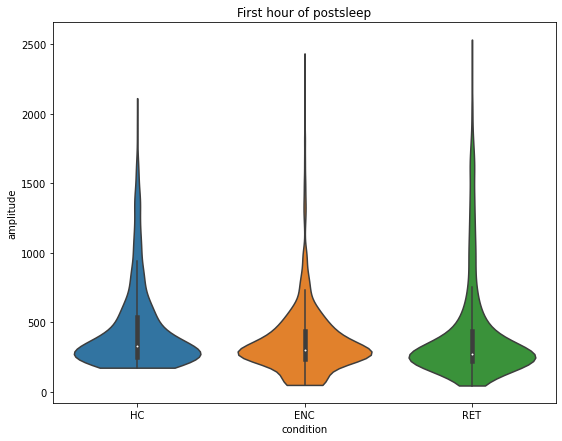

In [51]:
plt.figure(figsize=(9,7))
sns.violinplot(x=short_ripple_h1['condition'], y=short_ripple_h1['amplitude'], data=short_ripple_h1, cut=0).set(title='First hour of postsleep')

[Text(0.5, 1.0, 'First hour of postsleep')]

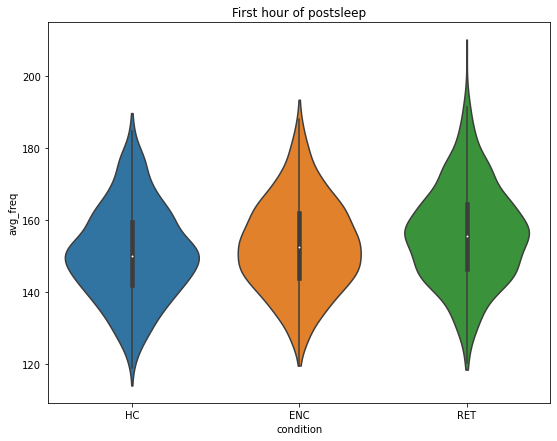

In [52]:
plt.figure(figsize=(9,7))
sns.violinplot(x=short_ripple_h1['condition'], y=short_ripple_h1['avg_freq'], data=short_ripple_h1, cut=0).set(title='First hour of postsleep')

In [61]:
#Sort df
sorted = short_ripple_h1.sort_values(by='p2p_dist', axis=0, ascending=True)

#95th percentile
print(sorted.quantile(q=0.95, axis=0))

#5th percentile
print(sorted.quantile(q=0.05, axis=0))

inst_freq           179.615018
avg_freq            176.544278
amplitude          1159.158033
auc                  24.038352
duration              0.095000
p2p_dist           2017.809898
power            183822.132968
entropy               1.156179
num_of_peaks         15.000000
spect_entropy         5.671887
hour                  2.000000
rat                   4.000000
Name: 0.95, dtype: float64
inst_freq         127.264061
avg_freq          131.760125
amplitude         105.992427
auc                 1.824555
duration            0.051667
p2p_dist          164.924274
power            1031.340492
entropy             0.983376
num_of_peaks        7.000000
spect_entropy       4.725723
hour                2.000000
rat                 1.000000
Name: 0.05, dtype: float64


[Text(0.5, 1.0, 'First hour of postsleep')]

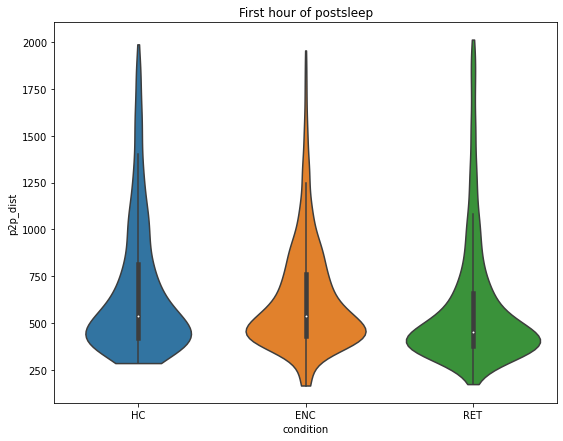

In [63]:
plt.figure(figsize=(9,7))
sns.violinplot(x=short_ripple_h1[(short_ripple_h1['p2p_dist']<2017) & (short_ripple_h1['p2p_dist']>165)]['condition'], y=short_ripple_h1[(short_ripple_h1['p2p_dist']<2017) & (short_ripple_h1['p2p_dist']>165)]['p2p_dist'], data=short_ripple_h1, cut=0).set(title='First hour of postsleep')